In [2]:
# Import python packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm # Import SVM model

# Import sklearn metrics for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [25]:
# Import the heart disease dataset
data = pd.read_csv('heart.csv')

# Display first 5 lines of data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
# Display information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [27]:
# Display statistics of data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


HISTOGRAMS


<function matplotlib.pyplot.show(close=None, block=None)>

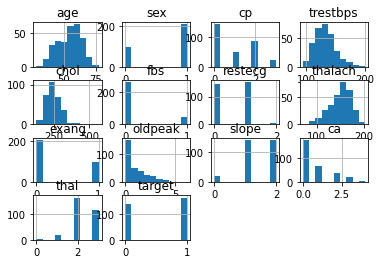

In [5]:
# Analysis of data

# Histogram
print('HISTOGRAMS')
data.hist()
plt.show

LINEAR GRAPH


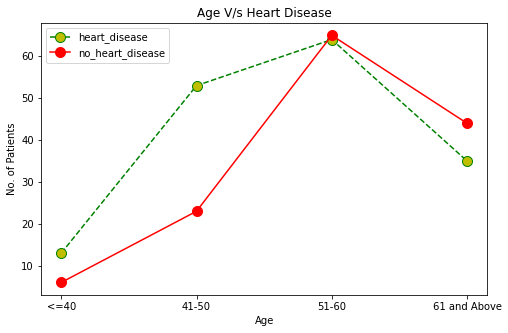

In [15]:
# Plot a Linear Graph for Age V/s Heart Disease  
print('LINEAR GRAPH')
plt.subplots(figsize = (8,5))
classifiers = ['<=40', '41-50', '51-60', '61 and Above']
heart_disease = [13, 53, 64, 35]
no_heart_disease = [6, 23, 65, 44]

l1 = plt.plot(classifiers, heart_disease, color = 'g', marker = 'o', linestyle = 'dashed', markerfacecolor = 'y', markersize = '10')
l2 = plt.plot(classifiers, no_heart_disease, color = 'r', marker = 'o', linestyle = 'solid', markerfacecolor = 'r', markersize = '10')

plt.xlabel('Age')
plt.ylabel('No. of Patients')
plt.title('Age V/s Heart Disease')
plt.legend((l1[0], l2[0]), ('heart_disease', 'no_heart_disease'))
plt.show()

BAR GRAPH


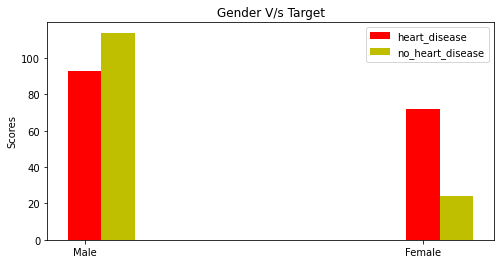

In [13]:
# Plot a Bar Graph for Gender V/s Target
print('BAR GRAPH')
N = 2
ind = np.arange(N)
width = 0.1
fig, ax = plt.subplots(figsize = (8,4))

heart_disease = [93, 72]
rects1 = ax.bar(ind, heart_disease, width, color = 'r')

no_heart_disease = [114, 24]
rects2 = ax.bar(ind + width, no_heart_disease, width, color = 'y')

ax.set_ylabel('Scores')
ax.set_title('Gender V/s Target')
ax.set_xticks(ind)
ax.set_xticklabels(('Male', 'Female'))
ax.legend((rects1[0], rects2[0]), ('heart_disease', 'no_heart_disease'))
plt.show()

In [16]:
# Separate Feature and Target Matrix
x = data.drop('target', axis = 1)
y = data.target 

In [17]:
# Split dataset into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =100)
# 70% training data and 30% testing data

In [18]:
# Create a SVM CLassifier
m1 = svm.SVC(kernel = 'linear') # linear kernel

# Training the model using training sets
m1.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = m1.predict(x_test)

In [20]:
# Check accuracy of the Model
res = confusion_matrix(y_test, y_pred)
print('CONFUSION MATRIX:')
print(res, "\n")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print('\nClassification Report: ')
print(classification_report(y_test, y_pred))

CONFUSION MATRIX:
[[35 11]
 [ 5 40]] 

Accuracy Score: 0.8241758241758241

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        46
           1       0.78      0.89      0.83        45

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

